If you aggregate
the predictions of a group of predictors (such as classifiers or regressors), you will
often get better predictions than with the best individual predictor. A group of predictors
is called an ensemble; thus, this technique is called Ensemble Learning, and an
Ensemble Learning algorithm is called an Ensemble method.

The goal of ensemble methods is to combine the predictions of several base estimators built with a given learning algorithm in order to improve generalizability / robustness over a single estimator.

The combined estimator is usually better than any of the single base estimator because its variance is reduced.

Ensemble methods work best when the predictors are as independent
from one another as possible. One way to get diverse classifiers
is to train them using very different algorithms. This increases the
chance that they will make very different types of errors, improving
the ensemble’s accuracy.

Ensemble methods :- bagging,
boosting, and stacking, blending

Max Voting, Averaging , Weighted Average

Bagging and boosting are two widely used ensemble learners. Though these two techniques can be used with several statistical models, the most predominant usage has been with decision trees.**bagging methods work best with strong and complex models (e.g., fully developed decision trees), in contrast with boosting methods which usually work best with weak models (e.g., shallow decision trees).**
## Bagging and Pasting
One way to get a diverse set of classifiers is to use very different training algorithms,
as just discussed. Another approach is to use the same training algorithm for every
predictor and train them on different random subsets of the training set. **When sampling is performed with replacement, this method is called bagging (short for bootstrap
aggregating). When sampling is performed without replacement, it is called
pasting.**
In other words, both bagging and pasting allow training instances to be sampled several
times across multiple predictors, but only bagging allows training instances to be
sampled several times for the same predictor.

Once all predictors are trained, **the ensemble can make a prediction for a new
instance by simply aggregating the predictions of all predictors**. The aggregation
function is typically the statistical mode (i.e., the most frequent prediction) for classification, or the average for regression. Each individual
predictor has a higher bias than if it were trained on the original training set, but
**aggregation reduces both bias and variance**. Generally, the net result is that the
ensemble has a similar bias but a lower variance than a single predictor trained on the
original training set.

**Why do we use Bagging ?** If you create all the models on the same set of data and combine it, will it be useful? There is a high chance that these models will give the same result since they are getting the same input. So how can we solve this problem? One of the techniques is bootstrapping(Bagging)

**Bagging :**
#1.Multiple subsets are created from the original dataset, selecting observations with replacement.
#2.A base model (weak model) is created on each of these subsets.
#3.The models run in parallel and are independent of each other.
#4.The final predictions are determined by combining the predictions from all the models

#**Bagging meta-estimator - use all features**
#**RandomForest - use selected features at each node**
#**Extra-Trees**

### Bagging meta-estimator
 Scikit-Learn offers a simple API for both bagging and pasting with the **BaggingClassifier (or BaggingRegressor for regression)**
 
**The subset of the dataset includes all features.**

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500,
    max_samples=100, bootstrap=True, n_jobs=-1)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

**bootstrap=False**: to use pasting instead of bagging

**n_jobs** : number of CPU cores to use for training and predictions
(–1 tells Scikit-Learn to use all available cores).

In [2]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.912


In [3]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)
print(accuracy_score(y_test, y_pred_tree))

0.856


**the ensemble has a
comparable bias but a smaller variance** (it makes roughly the same number of errors
on the training set, but the decision boundary is less irregular).

Bootstrapping introduces a bit more diversity in the subsets that each predictor is
trained on, so **bagging ends up with a slightly higher bias than pasting**; but the extra
diversity also means that the predictors end up being less correlated, so the **ensemble’s
variance is reduced**. Overall, bagging often results in better models, which explains
why it is generally preferred.
### Out-of-Bag Evaluation
With bagging, some instances may be sampled several times for any given predictor,
while others may not be sampled at all. By default a BaggingClassifier samples m
training instances with replacement (bootstrap=True), where m is the size of the
training set. This means that **only about 63% of the training instances are sampled on
average for each predictor. The remaining 37% of the training instances that are not
sampled are called out-of-bag (oob) instances**. Note that they are not the same 37%
for all predictor.

In Scikit-Learn, you can set **oob_score=True** when creating a BaggingClassifier to
request an automatic oob evaluation after training.

Since a predictor never sees the oob instances during training, it can be evaluated on
these instances, without the need for a separate validation set. You can evaluate the
ensemble itself by averaging out the oob evaluations of each predictor.

In [4]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500,
    bootstrap=True, n_jobs=-1, oob_score=True)

bag_clf.fit(X_train, y_train)
bag_clf.oob_score_

0.9013333333333333

According to this oob evaluation, this BaggingClassifier is likely to achieve about
89.6% accuracy on the test set. Let’s verify this:

In [5]:
>>> from sklearn.metrics import accuracy_score
>>> y_pred = bag_clf.predict(X_test)
>>> accuracy_score(y_test, y_pred)

0.912

We get 90.4% accuracy on the test set—close enough!

In [6]:
bag_clf.oob_decision_function_

array([[0.39664804, 0.60335196],
       [0.31770833, 0.68229167],
       [1.        , 0.        ],
       [0.00625   , 0.99375   ],
       [0.00515464, 0.99484536],
       [0.09090909, 0.90909091],
       [0.33684211, 0.66315789],
       [0.00564972, 0.99435028],
       [0.98907104, 0.01092896],
       [0.96703297, 0.03296703],
       [0.78918919, 0.21081081],
       [0.        , 1.        ],
       [0.77844311, 0.22155689],
       [0.84408602, 0.15591398],
       [0.95505618, 0.04494382],
       [0.05978261, 0.94021739],
       [0.        , 1.        ],
       [0.9744898 , 0.0255102 ],
       [0.95054945, 0.04945055],
       [0.99456522, 0.00543478],
       [0.02083333, 0.97916667],
       [0.32386364, 0.67613636],
       [0.91208791, 0.08791209],
       [1.        , 0.        ],
       [0.97206704, 0.02793296],
       [0.        , 1.        ],
       [0.99435028, 0.00564972],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.6       , 0.4       ],
       [0.

**oob_decision_function_** - The decision function returns the class probabilities for each training instance.
### Random Patches and Random Subspaces
The BaggingClassifier class **supports sampling the features** as well. Sampling is
controlled by two hyperparameters: **max_features and bootstrap_features**. They
work the same way as max_samples and bootstrap, but for feature sampling instead
of instance sampling. Thus, **each predictor will be trained on a random subset of the
input features**.

This technique is particularly useful when you are dealing with high-dimensional
inputs (such as images). **Sampling both training instances and features is called the
Random Patches method**. Keeping all training instances (by setting bootstrap=False and max_samples=1.0) but sampling features (by setting bootstrap_features to
True and/or max_features to a value smaller than 1.0) is called the **Random Subspaces
method.
Sampling features** results in even more predictor diversity, trading a bit more bias for
a lower variance.
## Random Forests
Random Forest is an **ensemble of Decision Trees, generally
trained via the bagging method (or sometimes pasting)**, typically with **max_samples
set to the size of the training set**.

Unlike bagging meta estimator, **random forest randomly selects a set of features** which are used to decide the best split at each node of the decision tree.

In [7]:
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)
rnd_clf.fit(X_train, y_train)
y_pred_rf = rnd_clf.predict(X_test)

With a few exceptions, a RandomForestClassifier has all the hyperparameters of a
DecisionTreeClassifier (to control how trees are grown), plus all the hyperparameters
of a BaggingClassifier to control the ensemble itself.

The Random Forest algorithm introduces extra randomness when growing trees;
**instead of searching for the very best feature when splitting a node , it
searches for the best feature among a random subset of features**. The algorithm
results in greater tree diversity, which (again) trades a **higher bias for a lower variance**,
generally yielding an overall better model. .

The following BaggingClassifier
is roughly equivalent to the previous RandomForestClassifier

In [8]:
bag_clf = BaggingClassifier(
DecisionTreeClassifier(splitter="random", max_leaf_nodes=16),
n_estimators=500, max_samples=1.0, bootstrap=True, n_jobs=-1)

### Extra-Trees
When you are growing a tree in a Random Forest, at each node only a random subset
of the features is considered for splitting . It is possible to make
trees even more random by also using random thresholds for each feature rather than
searching for the best possible thresholds .
A forest of such extremely random trees is called an **Extremely Randomized Trees
ensemble(or Extra-Trees for short)**.Once again, this technique trades more bias for
a lower variance. It also makes **Extra-Trees much faster to train than regular Random
Forests**, because finding the best possible threshold for each feature at every node is
one of the most time-consuming tasks of growing a tree.

You can create an Extra-Trees classifier using Scikit-Learn’s **ExtraTreesClassifier**
class. Its API is identical to the RandomForestClassifier class. Similarly, the **Extra
TreesRegressor** class has the same API as the RandomForestRegressor class.

It is hard to tell in advance whether a RandomForestClassifier
will perform better or worse than an ExtraTreesClassifier. Generally,
the only way to know is to try both and compare them using
cross-validation (tuning the hyperparameters using grid search).
### Feature Importance
great quality of Random Forests is that they make it easy to **measure the
relative importance of each feature**. Scikit-Learn measures a feature’s importance by
looking at how much the tree nodes that use that feature reduce impurity on average
(across all trees in the forest). More precisely, it is a weighted average, where each
node’s weight is equal to the number of training samples that are associated with it

Scikit-Learn computes this score automatically for each feature after training, then it
scales the results so that the sum of all importances is equal to 1. You can access the
result using the **feature_importances_ variable**.

In [9]:
from sklearn.datasets import load_iris
>>> iris = load_iris()
>>> rnd_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1)
>>> rnd_clf.fit(iris["data"], iris["target"])
>>> for name, score in zip(iris["feature_names"], rnd_clf.feature_importances_):
        print(name, score)

sepal length (cm) 0.09523891522435834
sepal width (cm) 0.018481793228398394
petal length (cm) 0.4366706382633779
petal width (cm) 0.44960865328386584


Random Forests are very handy to get a quick understanding of what features
actually matter, in particular if you need to perform **feature selection**.

## Boosting
Boosting (originally called hypothesis boosting) refers to any Ensemble method that
can combine several weak learners into a strong learner. The general idea of most
boosting methods is to **train predictors sequentially, each trying to correct its predecessor**.

Base estimators are built sequentially and one tries to reduce the bias of the combined estimator. The motivation is to **combine several weak models to produce a powerful ensemble.**

**Why do we use boosting?** If a data point is incorrectly predicted by the first model, and then the next (probably all models), will combining the predictions provide better results? Such situations are taken care of by boosting.

#1.A subset is created from the original dataset.
#2.Initially, all data points are given equal weights.
#3.A base model is created on this subset.
#4.This model is used to make predictions on the whole dataset.
#5.Errors are calculated using the actual values and predicted values.
#6.The observations which are incorrectly predicted, are given higher weights.
#7.Another model is created and predictions are made on the dataset.
(This model tries to correct the errors from the previous model)
#8.Similarly, multiple models are created, each correcting the errors of the previous model.
#9.The final model (strong learner) is the weighted mean of all the models (weak learners)

**The individual models would not perform well on the entire dataset, but they work well for some part of the dataset**

#AdaBoost
#GBM
#XGBM
#Light GBM
#CatBoost

### AdaBoost ( Adaptive Boosting)
One way for a **new predictor to correct its predecessor is to pay a bit more attention
to the training instances that the predecessor underfitted. This results in new predictors
focusing more and more on the hard cases**. This is the technique used by
AdaBoost.

Adaboost minimizes the exponential loss using a series of any desired weak learners .

When training an AdaBoost classifier, the algorithm first trains a base
classifier (such as a Decision Tree) giving all observations in the dataset equal weights and uses it to make predictions on the training set.
The algorithm then increases the relative weight of misclassified training instances.
Then it trains a second classifier, for same data set but using the updated weights and again makes predictions
on the training set, updates the instance weights, and so on.This process is repeated until the error function does not change, or the maximum limit of the number of estimators is reached.

Once all predictors are trained, the ensemble makes predictions very much like bagging
or pasting, except that predictors have different weights depending on their
overall accuracy on the weighted training set

There is one **important drawback** to this sequential learning technique:
it cannot be parallelized (or only partially), since each predictor
can only be trained after the previous predictor has been
trained and evaluated. As a result, it does not scale as well as bagging
or pasting.

Scikit-Learn uses a **multiclass version of AdaBoost called SAMME** (which stands for
Stagewise Additive Modeling using a Multiclass Exponential loss function). When there
are just two classes, SAMME is equivalent to AdaBoost. If the predictors can estimate
class probabilities (i.e., if they have a predict_proba() method), Scikit-Learn can use
a variant of SAMME called **SAMME.R (the R stands for “Real”), which relies on class
probabilities rather than predictions** and generally performs better.

In [10]:
from sklearn.ensemble import AdaBoostClassifier
ada_clf = AdaBoostClassifier(
DecisionTreeClassifier(max_depth=1), n_estimators=200,
algorithm="SAMME.R", learning_rate=0.5)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=0.5, n_estimators=200, random_state=None)

**If your AdaBoost ensemble is overfitting the training set, you can
try reducing the number of estimators or more strongly regularizing
the base estimator.**

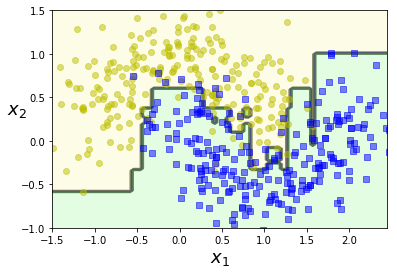

In [15]:
plot_decision_boundary(ada_clf, X, y)

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.45, -1, 1.5], alpha=0.5, contour=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

### Gradient Boosting
Gradient Boosting works by sequentially adding predictors to an ensemble, each one
correcting its predecessor. However, **instead of tweaking the instance weights at every
iteration like AdaBoost does, this method tries to fit the new predictor to the residual
errors made by the previous predictor.**

Whereas Adaboost tries to use observation weights to inform training, **gradient boosting tries to follow a gradient**.

**Diff between AdaBoost & GBM**: 
#At each iteration, adaptive boosting changes the sample distribution by modifying the weights attached to each of the instances. It increases the weights of the wrongly predicted instances and decreases the ones of the correctly predicted instances. The weak learner thus focuses more on the difficult instances. After being trained, the weak learner is added to the strong one according to his performance (so-called alpha weight). The higher it performs, the more it contributes to the strong learner.
#On the other hand, gradient boosting doesn’t modify the sample distribution. Instead of training on a newly sample distribution, the weak learner trains on the remaining errors (so-called pseudo-residuals) of the strong learner.At each iteration, the pseudo-residuals are computed and a weak learner is fitted to these pseudo-residuals. Then, the contribution of the weak learner (so-called multiplier) to the strong one isn’t computed according to his performance on the newly distribution sample but using a **gradient descent optimization process**. The computed contribution is the one minimizing the overall error of the strong learner.

Gradient boosting **calculate essentially the gradient of the loss function with respect to the prediction** (instead of the features) and this way generates an extra ‘helper prediction’ to enhance the prediction and make the weak prediction closer and closer to y_test

Using Decision Trees as the base predictors
(of course, Gradient Boosting also works great with regression tasks). This is
called **Gradient Tree Boosting, or Gradient Boosted Regression Trees (GBRT)**.It is a generalization of boosting to arbitrary
differentiable loss functions.

Gradient Tree Boosting models are used in a variety of areas including Web search ranking and ecology.

In [16]:
np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)

In [17]:
from sklearn.tree import DecisionTreeRegressor

tree_reg1 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg1.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

In [18]:
y2 = y - tree_reg1.predict(X)
tree_reg2 = DecisionTreeRegressor(max_depth=2)
tree_reg2.fit(X, y2)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [19]:
y3 = y2 - tree_reg2.predict(X)
tree_reg3 = DecisionTreeRegressor(max_depth=2)
tree_reg3.fit(X, y3)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [20]:
X_new = np.array([[0.8]])
y_pred = sum(i.predict(X_new) for i in (tree_reg1, tree_reg2, tree_reg3))

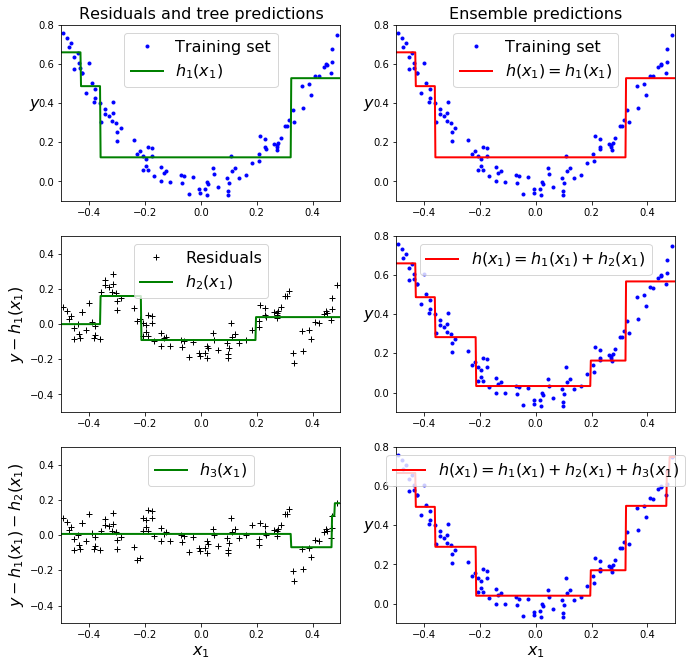

In [22]:
plt.figure(figsize=(11,11))

plt.subplot(321)
plot_predictions([tree_reg1], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h_1(x_1)$", style="g-", data_label="Training set")
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.title("Residuals and tree predictions", fontsize=16)

plt.subplot(322)
plot_predictions([tree_reg1], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h(x_1) = h_1(x_1)$", data_label="Training set")
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.title("Ensemble predictions", fontsize=16)

plt.subplot(323)
plot_predictions([tree_reg2], X, y2, axes=[-0.5, 0.5, -0.5, 0.5], label="$h_2(x_1)$", style="g-", data_style="k+", data_label="Residuals")
plt.ylabel("$y - h_1(x_1)$", fontsize=16)

plt.subplot(324)
plot_predictions([tree_reg1, tree_reg2], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h(x_1) = h_1(x_1) + h_2(x_1)$")
plt.ylabel("$y$", fontsize=16, rotation=0)

plt.subplot(325)
plot_predictions([tree_reg3], X, y3, axes=[-0.5, 0.5, -0.5, 0.5], label="$h_3(x_1)$", style="g-", data_style="k+")
plt.ylabel("$y - h_1(x_1) - h_2(x_1)$", fontsize=16)
plt.xlabel("$x_1$", fontsize=16)

plt.subplot(326)
plot_predictions([tree_reg1, tree_reg2, tree_reg3], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h(x_1) = h_1(x_1) + h_2(x_1) + h_3(x_1)$")
plt.xlabel("$x_1$", fontsize=16)
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.show()

You can see that the ensemble’s predictions gradually get better as
trees are added to the ensemble.

A simpler way to train GBRT ensembles is to use Scikit-Learn’s **GradientBoostingRe
gressor** class. Much like the RandomForestRegressor class, it has hyperparameters to
control the growth of Decision Trees (e.g., max_depth, min_samples_leaf), as well as
hyperparameters to control the ensemble training, such as the number of trees
(n_estimators).

In [23]:
from sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1.0, random_state=42)
gbrt.fit(X, y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=1.0, loss='ls', max_depth=2, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=3, n_iter_no_change=None, presort='auto',
             random_state=42, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

The **learning_rate** hyperparameter scales the contribution of each tree. If you set it
to a low value, such as 0.1, you will need more trees in the ensemble to fit the training
set, but the predictions will usually generalize better. This is a regularization technique
called shrinkage.

In [1]:
gbrt_slow = GradientBoostingRegressor(max_depth=2, n_estimators=200, learning_rate=0.1, random_state=42)
gbrt_slow.fit(X, y)

NameError: name 'GradientBoostingRegressor' is not defined

**n_estimators** is set to 200, we do not expect to get anywhere near there, and the early-stopping will stop growing new trees when our internal validation error has not improved for 15 iterations.

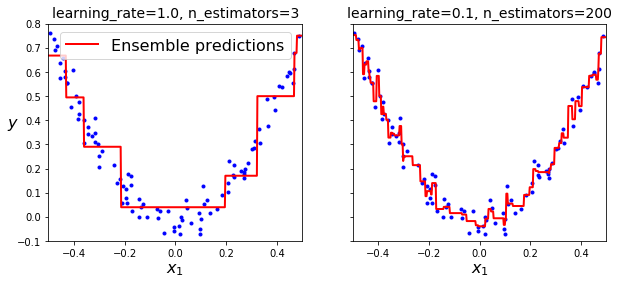

In [25]:
fix, axes = plt.subplots(ncols=2, figsize=(10,4), sharey=True)

plt.sca(axes[0])
plot_predictions([gbrt], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="Ensemble predictions")
plt.title("learning_rate={}, n_estimators={}".format(gbrt.learning_rate, gbrt.n_estimators), fontsize=14)
plt.xlabel("$x_1$", fontsize=16)
plt.ylabel("$y$", fontsize=16, rotation=0)

plt.sca(axes[1])
plot_predictions([gbrt_slow], X, y, axes=[-0.5, 0.5, -0.1, 0.8])
plt.title("learning_rate={}, n_estimators={}".format(gbrt_slow.learning_rate, gbrt_slow.n_estimators), fontsize=14)
plt.xlabel("$x_1$", fontsize=16)
plt.show()

#### Gradient Boosting with Early stopping
In order to  .find the optimal number of trees, you can use early stopping .

A simple way to implement this is to use the ***staged_predict()** method: it
returns an iterator over the predictions made by the ensemble at each stage of training
(with one tree, two trees, etc.).

The following code trains a GBRT ensemble with
120 trees, then measures the validation error at each stage of training to find the optimal
number of trees, and finally trains another GBRT ensemble using the optimal
number of trees.

In [26]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=49)

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=120, random_state=42)
gbrt.fit(X_train, y_train)

errors = [mean_squared_error(y_val, y_pred)
          for y_pred in gbrt.staged_predict(X_val)]
bst_n_estimators = np.argmin(errors) + 1

gbrt_best = GradientBoostingRegressor(max_depth=2, n_estimators=bst_n_estimators, random_state=42)
gbrt_best.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=2, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=56, n_iter_no_change=None, presort='auto',
             random_state=42, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [27]:
min_error = np.min(errors)
min_error

0.002712853325235463

Text(0.5, 0, '$x_1$')

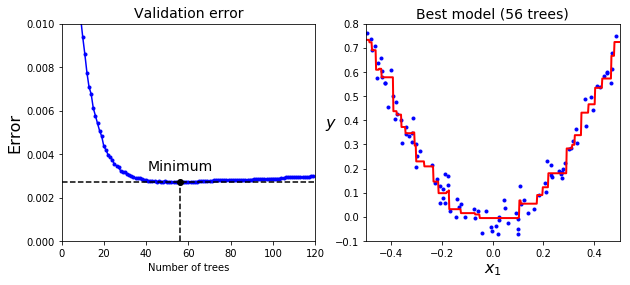

In [28]:
plt.figure(figsize=(10, 4))

plt.subplot(121)
plt.plot(errors, "b.-")
plt.plot([bst_n_estimators, bst_n_estimators], [0, min_error], "k--")
plt.plot([0, 120], [min_error, min_error], "k--")
plt.plot(bst_n_estimators, min_error, "ko")
plt.text(bst_n_estimators, min_error*1.2, "Minimum", ha="center", fontsize=14)
plt.axis([0, 120, 0, 0.01])
plt.xlabel("Number of trees")
plt.ylabel("Error", fontsize=16)
plt.title("Validation error", fontsize=14)

plt.subplot(122)
plot_predictions([gbrt_best], X, y, axes=[-0.5, 0.5, -0.1, 0.8])
plt.title("Best model (%d trees)" % bst_n_estimators, fontsize=14)
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.xlabel("$x_1$", fontsize=16)

It is also possible to implement early stopping by actually stopping training early
(instead of training a large number of trees first and then looking back to find the
optimal number). You can do so by setting **warm_start=True**, which makes Scikit-
Learn keep existing trees when the fit() method is called, allowing incremental
training.

In [29]:
gbrt = GradientBoostingRegressor(max_depth=2, warm_start=True, random_state=42)

min_val_error = float("inf")
error_going_up = 0
for n_estimators in range(1, 120):
    gbrt.n_estimators = n_estimators
    gbrt.fit(X_train, y_train)
    y_pred = gbrt.predict(X_val)
    val_error = mean_squared_error(y_val, y_pred)
    if val_error < min_val_error:
        min_val_error = val_error
        error_going_up = 0
    else:
        error_going_up += 1
        if error_going_up == 5:
            break  # early stopping

The GradientBoostingRegressor class also supports a **subsample** hyperparameter,
which specifies the fraction of training instances to be used for training each tree. For
example, if subsample=0.25, then each tree is trained on 25% of the training instances,
selected randomly. As you can probably guess by now, this technique trades a
higher bias for a lower variance. It also speeds up training considerably. This is called
**Stochastic Gradient Boosting**.

It is possible to use Gradient Boosting with other cost functions.
This is controlled by the **loss** hyperparameter

### XGBoost
An optimized and fastest implementation of Gradient Boosting is available in the popular Python library XGBoost, which stands for **Extreme Gradient Boosting**.In XGBoost, we fit a model on the gradient of loss generated from the previous step. In XGBoost, **we just modified our gradient boosting algorithm so that it works with any differentiable loss function.**

It aims to be extremely fast, scalable,
and portable as it drives fast learning through parallel and distributed computing and offers efficient memory usage.

It also includes a variety of regularization which reduces overfitting and improves overall performance by implementing **effective regularization hyperparameters** on the underlying trees , called as ‘regularized boosting‘ technique.

#It is available in many different languages (such as Python, R, C, C++, Ruby, Julia, etc.).
#Regularization: XGBoost has an option to penalize complex models through both L1 and L2 regularization. Regularization helps in preventing overfitting
#Parallel Processing:For faster computing, XGBoost can make use of multiple cores on the CPU. This is possible because of a block structure in its system design. Data is sorted and stored in in-memory units called blocks. Unlike other algorithms, this enables the data layout to be reused by subsequent iterations, instead of computing it again. This feature also serves useful for steps like split finding and column sub-sampling.It also supports implementation on Hadoop.
#Handling sparse data: Missing values or data processing steps like one-hot encoding make data sparse. XGBoost incorporates a sparsity-aware split finding algorithm to handle different types of sparsity patterns in the data
#Distributed Computing for training very large models using a cluster of machines.
#Out-of-Core Computing - It optimizes the available disk space and maximizes its usage when handling huge datasets that do not fit into memory
#Cache Optimization of data structures and algorithm to make best use of hardware.
#XGBoost allows users to define custom optimization objectives and evaluation criteria adding a whole new dimension to the model.
#XGBoost has an in-built routine to handle missing values.
#Tree Pruning:XGBoost makes splits up to the max_depth specified and then starts pruning the tree backwards and removes splits beyond which there is no positive gain.
#Built-in Cross-Validation:XGBoost allows a user to run a cross-validation at each iteration of the boosting process and thus it is easy to get the exact optimum number of boosting iterations in a single run.


Disadvantage is that it **doesn’t have any special treatment of categorical features** like its competitors(LightGBM,CatBoost).
But specifying **tree_method='hist’**. This will bin the continuous features using histogram binning, reducing the amount of splits that need to be analyzed

In [4]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=49)

In [5]:
import xgboost
xgb_reg = xgboost.XGBRegressor()
xgb_reg.fit(X_train, y_train)
y_pred = xgb_reg.predict(X_val)
val_error = mean_squared_error(y_val, y_pred) # Not shown
print("Validation MSE:", val_error)

Validation MSE: 0.1158875528718271


XGBoost also offers several nice features, such as automatically taking care of early
stopping:

In [6]:
xgb_reg.fit(X_train, y_train,eval_set=[(X_val, y_val)], early_stopping_rounds=2)
y_pred = xgb_reg.predict(X_val)

[0]	validation_0-rmse:0.40582
Will train until validation_0-rmse hasn't improved in 2 rounds.
[1]	validation_0-rmse:0.35474
[2]	validation_0-rmse:0.32464
[3]	validation_0-rmse:0.30981
[4]	validation_0-rmse:0.30304
[5]	validation_0-rmse:0.30246
[6]	validation_0-rmse:0.30195
[7]	validation_0-rmse:0.30074
[8]	validation_0-rmse:0.29867
[9]	validation_0-rmse:0.30140
[10]	validation_0-rmse:0.29938
Stopping. Best iteration:
[8]	validation_0-rmse:0.29867



### LightGBM
Light GBM beats all the other algorithms when the **dataset is extremely large**. Compared to the other algorithms, Light GBM takes lesser time to run on a huge dataset.

LightGBM is a gradient boosting framework that uses tree-based algorithms and follows **leaf-wise approach** while other algorithms work in a level-wise(depth-wise) approach pattern.

Leaf wise splits lead to increase in complexity and may lead to overfitting and it can be overcome by specifying another parameter max-depth which specifies the depth to which splitting will occur.

#1.Faster training speed and higher efficiency: Light GBM use histogram based algorithm i.e it buckets continuous feature values into discrete bins which fasten the training procedure.
#2.Lower memory usage: Replaces continuous values to discrete bins which result in lower memory usage.
#3.Better accuracy than any other boosting algorithm: It produces much more complex trees by following leaf wise split approach rather than a level-wise approach which is the main factor in achieving higher accuracy. However, it can sometimes lead to overfitting which can be avoided by setting the max_depth parameter.
#4.Compatibility with Large Datasets: It is capable of performing equally good with large datasets with a significant reduction in training time as compared to XGBOOST.
#5.Parallel learning supported.

**For best fit**
#num_leaves        #min_data_in_leaf          #max_depth
 
**For faster speed**
#bagging_fraction#feature_fraction #max_bin 

**For better accuracy**
#Use bigger training data#num_leaves#max_bin

### CatBoost ( “CatBoostClassifier” , “CatBoostRegressor“)
CatBoost is a recently open-sourced machine learning algorithm from Yandex. It can easily integrate with deep learning frameworks like Google’s TensorFlow and Apple’s Core ML.

“CatBoost” name comes from two words **“Category” and “Boosting”.**

As discussed, the library works well with multiple Categories of data, such as audio, text, image including historical data.
Eg: fraud detection, recommendation items, forecasting 

“Boost” comes from gradient boosting machine learning algorithm as this library is based on gradient boosting library.

**Handling Categorical features automatically**
#1.It can easily integrate with deep learning frameworks like Google’s TensorFlow and Apple’s Core ML.
#2.Deep Learning works best for homogenous data(eg:image,sound,text)while gradient boosting works well on diverse data sources. #3.It also return very good result with relatively less data,unlike DL models that need to learn from a massive amount of data.
    As it yields state-of-the-art results without extensive data training typically required by other machine learning methods
#4.Provides powerful out-of-the-box support for the more descriptive data formats that accompany many business problems.
#5.You can use CatBoost from the command line, using an user-friendly API for both Python and R.
#6.It reduces the need for extensive hyper-parameter tuning and lower the chances of overfitting.
#7.In addition to this, CatBoost does not require conversion of data set to any specific format like XGBoost and LightGBM.

## Stacking
It is based on a simple idea: instead of using trivial functions
(such as hard voting) to aggregate the predictions of all predictors in an ensemble,
 **train a model to perform this aggregation**.
It uses predictions from multiple models (for example decision tree, knn or svm) to build a new model. This model is used for making predictions on the test set. 
## Blending
Blending follows the same approach as stacking but uses only a holdout (validation) set from the train set to make predictions. In other words, unlike stacking, the predictions are made on the holdout set only. The holdout set and the predictions are used to build a model which is run on the test set
 
## Voting - VotingClassifier/VotingRegressor
max voting method is generally used for classification problems. In this technique, multiple models are used to make predictions for each data point. The predictions by each model are considered as a ‘vote’. The predictions which we get from the majority of the models are used as the final prediction.
## Averaging
Similar to the max voting technique, multiple predictions are made for each data point in averaging. In this method, we take an average of predictions from all the models and use it to make the final prediction. Averaging can be used for making predictions in regression problems or while calculating probabilities for classification problems.
## Weighted Average
This is an extension of the averaging method. All models are assigned different weights defining the importance of each model for prediction

In [3]:
import lightgbm